In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

# Functions

In [ ]:
def read_lvm(path, date_i = 9, time_i = 10, header_i = 22):
    '''
    input = lvm file from labview.
    return dataframe with datetime info of load cells data.
    '''
    with open(path,'r') as f:
        lines = f.readlines()
    date_time = pd.to_datetime(lines[date_i].strip().split('\t')[1] +' ' + lines[time_i].strip().split('\t')[1])
    data = []
    for line in lines[header_i+1:]:
        try:
            data.append(pd.to_numeric(line.strip().split('\t')))
        except:
            pass
    df = pd.DataFrame(data,columns=lines[header_i].strip().split('\t')[:len(data[0])])
    df['datetime'] = pd.to_timedelta(df.X_Value,unit='s') + date_time
    return df

def load2zeros(df, start_i = 0, duration_s = 90):
    dt_ini = df.datetime[start_i]
    dt_end = dt_ini + pd.to_timedelta(duration_s,unit='s')
    l1,l2 = df.loc[(df.datetime>=dt_ini)&(df.datetime<=dt_end),['MS-3k-S_Loadcell (Resampled)','Airtech 3k ZLoad-CH2 (Resampled)']].mean().values
    df['MS-3k-S_Loadcell (Resampled)'] = df['MS-3k-S_Loadcell (Resampled)'] - l1
    df['Airtech 3k ZLoad-CH2 (Resampled)'] = df['Airtech 3k ZLoad-CH2 (Resampled)'] - l2
    return df

# Development

## Read Load data

In [3]:
loadfiles = r'C:\Users\dmchacon\Documents\Load Cell'
paths = glob.glob(os.path.join(loadfiles,'*.lvm'))
paths

['C:\\Users\\dmchacon\\Documents\\Load Cell\\2_10.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_11.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_14(2).lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_14.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_16.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_16_(2).lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_16_(3).lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_4.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_5.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_6.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_8.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_11.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_12(2).lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_12.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_14.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_16.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load Cell\\3_18.lvm',
 'C:\\Users\\dmchacon\\Documents\\Load

In [48]:
paths[10]

'C:\\Users\\dmchacon\\Documents\\Load Cell\\2_8.lvm'

In [5]:
with open(paths[10],'r') as f:
    lines = f.readlines()
lines

['LabVIEW Measurement\t\n',
 'Writer_Version\t2\n',
 'Reader_Version\t2\n',
 'Separator\tTab\n',
 'Decimal_Separator\t.\n',
 'Multi_Headings\tNo\n',
 'X_Columns\tOne\n',
 'Time_Pref\tAbsolute\n',
 'Operator\tLab Materiales\n',
 'Date\t2022/11/23\n',
 'Time\t20:06:47.0438408999998171043\n',
 '***End_of_Header***\t\n',
 '\t\n',
 'Channels\t3\t\t\t\n',
 'Samples\t4\t4\t4\t\n',
 'Date\t2022/11/23\t2022/11/23\t2022/11/23\t\n',
 'Time\t20:06:47.0438408999998171043\t20:06:47.0438408999998171043\t20:06:47.0438408999998171043\t\n',
 'Y_Unit_Label\tlb\tPounds\tPounds\t\n',
 'X_Dimension\tTime\tTime\tTime\t\n',
 'X0\t0.0000000000000000E+0\t0.0000000000000000E+0\t0.0000000000000000E+0\t\n',
 'Delta_X\t0.100000\t0.100000\t0.100000\t\n',
 '***End_of_Header***\t\t\t\t\n',
 'X_Value\tMTS-Force-New (Resampled)\tMS-3k-S_Loadcell (Resampled)\tAirtech 3k ZLoad-CH2 (Resampled)\tComment\n',
 '0.000000\t-35839.528463\t6.831028\t29.978818\n',
 '0.100000\t-35843.852332\t5.933682\t30.272712\n',
 '0.200000\t-358

In [30]:
lines[22].strip().split('\t')

['X_Value',
 'MTS-Force-New (Resampled)',
 'MS-3k-S_Loadcell (Resampled)',
 'Airtech 3k ZLoad-CH2 (Resampled)',
 'Comment']

In [ ]:
date = 9
time = 10
header = 22

In [26]:
pd.to_datetime(lines[9].strip().split('\t')[1] +' ' + lines[10].strip().split('\t')[1])

Timestamp('2022-11-23 20:06:47.043840')

In [33]:
pd.to_numeric(lines[23].split('\n')[0].split('\t'))

array([ 0.00000000e+00, -3.58395285e+04,  6.83102800e+00,  2.99788180e+01])

In [28]:
pd.to_datetime(lines[9].strip().split('\t')[1] +' ' + lines[10].strip().split('\t')[1]) + pd.to_timedelta(1, unit='s')

Timestamp('2022-11-23 20:06:48.043840')

In [41]:
def read_lvm(path, date_i = 9, time_i = 10, header_i = 22):
    with open(path,'r') as f:
        lines = f.readlines()
    date_time = pd.to_datetime(lines[date_i].strip().split('\t')[1] +' ' + lines[time_i].strip().split('\t')[1])
    data = []
    for line in lines[header_i+1:]:
        try:
            data.append(pd.to_numeric(line.strip().split('\t')))
        except:
            pass
    df = pd.DataFrame(data,columns=lines[header_i].strip().split('\t')[:len(data[0])])
    df['datetime'] = pd.to_timedelta(df.X_Value,unit='s') + date_time
    return df

In [42]:
df = read_lvm(paths[10])

In [43]:
df

,X_Value,MTS-Force-New (Resampled),MS-3k-S_Loadcell (Resampled),Airtech 3k ZLoad-CH2 (Resampled),datetime
0,0.0,-35839.528463,6.831028,29.978818,2022-11-23 20:06:47.043840
1,0.1,-35843.852332,5.933682,30.272712,2022-11-23 20:06:47.143840
2,0.2,-35843.375810,5.366654,29.810727,2022-11-23 20:06:47.243840
3,0.3,-35841.998292,5.421051,29.295018,2022-11-23 20:06:47.343840
4,80.6,-35883.479040,6.181541,30.780253,2022-11-23 20:08:07.643840
...,...,...,...,...,...
1283,208.5,-36604.910781,390.687020,417.994766,2022-11-23 20:10:15.543840
1284,208.6,-36604.434524,391.345349,419.037909,2022-11-23 20:10:15.643840
1285,208.7,-36604.275462,391.629632,418.910472,2022-11-23 20:10:15.743840
1286,208.8,-36608.354512,394.459294,420.897865,2022-11-23 20:10:15.843840


<AxesSubplot: xlabel='datetime'>

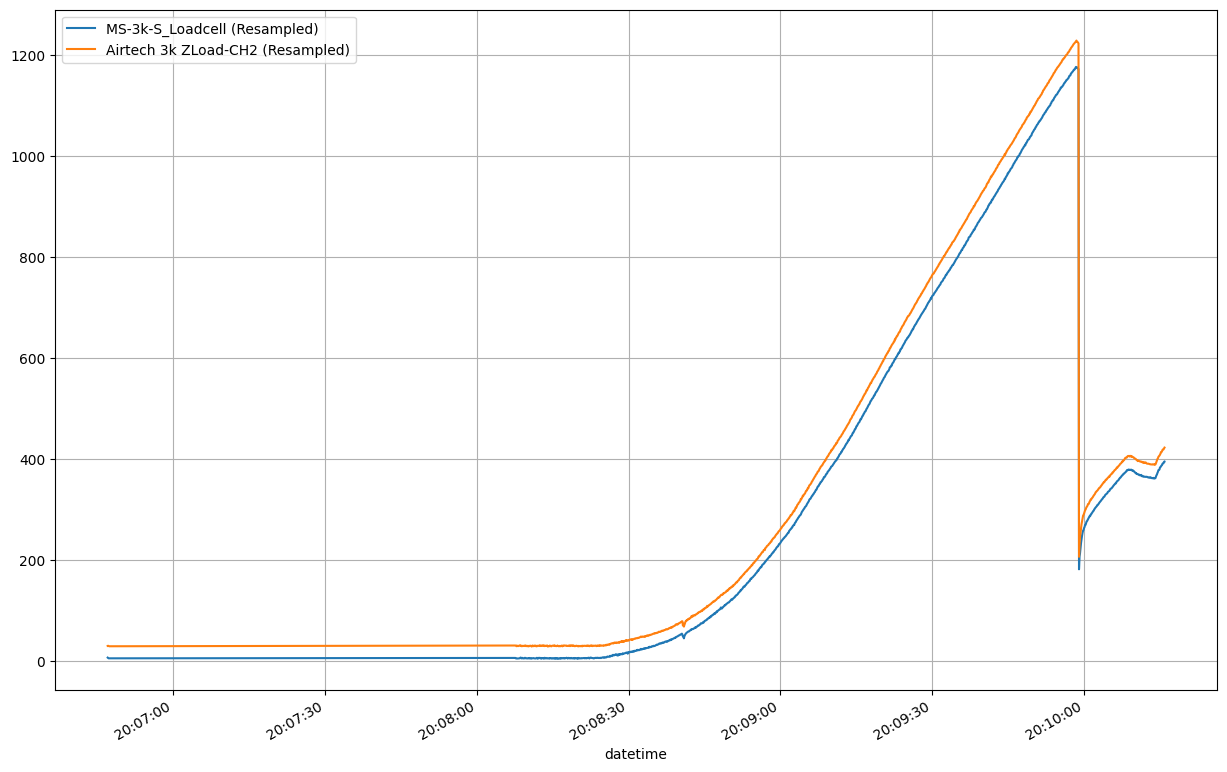

In [49]:
df.plot('datetime',['MS-3k-S_Loadcell (Resampled)','Airtech 3k ZLoad-CH2 (Resampled)'],figsize= (15,10),grid=True)

In [61]:
def load2zeros(df, start_i = 0, duration_s = 90):
    dt_ini = df.datetime[start_i]
    dt_end = dt_ini + pd.to_timedelta(duration_s,unit='s')
    l1,l2 = df.loc[(df.datetime>=dt_ini)&(df.datetime<=dt_end),['MS-3k-S_Loadcell (Resampled)','Airtech 3k ZLoad-CH2 (Resampled)']].mean().values
    df['MS-3k-S_Loadcell (Resampled)'] = df['MS-3k-S_Loadcell (Resampled)'] - l1
    df['Airtech 3k ZLoad-CH2 (Resampled)'] = df['Airtech 3k ZLoad-CH2 (Resampled)'] - l2
    return df

In [62]:
df = load2zeros(df)

<AxesSubplot: xlabel='datetime'>

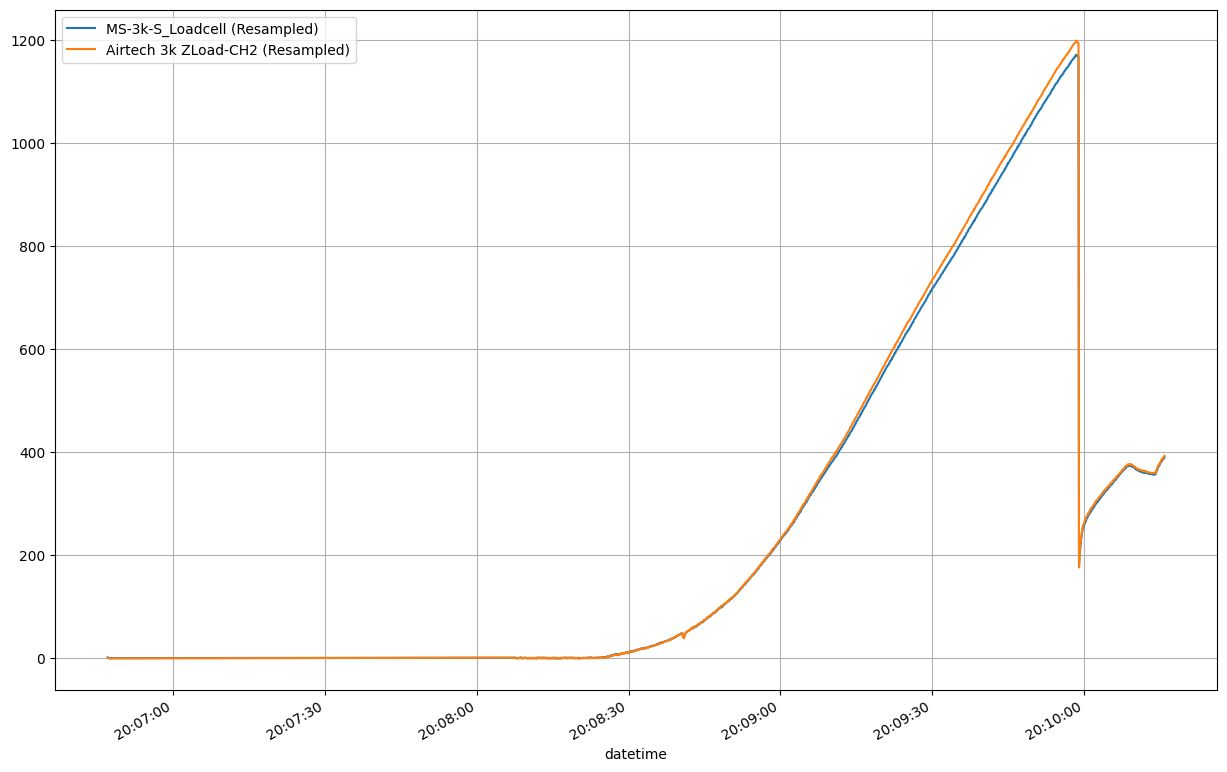

In [63]:
df.plot('datetime',['MS-3k-S_Loadcell (Resampled)','Airtech 3k ZLoad-CH2 (Resampled)'],figsize= (15,10),grid=True)